# **Multiple Ridge Regression Models for the CDK2 K<sub>i</sub> Dataset Generated with Molegro Virtual Docker**

This Jupyter Notebook builds multiple regression models using the Ridge method (also known as Tikhonov regularization) ([Tikhonov, 1963](https://scholar.google.com/scholar?q=A.+N.+Tikhonov,+Solution+of+incorrectly+formulated+problems+and+the+regularization+method); [Géron, 2023](https://www.isbns.net/isbn/9781098125974/)) for data from the CDK2 K<sub>i</sub> dataset ([de Azevedo et al., 2024](https://doi.org/10.1002/jcc.27449)). This dataset employs the ligands described for case study 1 on the SAnDReS 2.0 paper but with energy terms and poses determined using Molegro Virtual Docker (MVD) ([Thomsen & Christensen, 2006](https://doi.org/10.1021/jm051197e)). MVD determined poses using differential evolution [Storn & Price, 1997](https://doi.org/10.1023/A:1008202821328) as a search algorithm and MolDock Score to estimate binding affinity. This code employs the [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) class from the [Scikit-Learn](https://scikit-learn.org/stable/) library ([Pedregosa et al., 2011](https://doi.org/10.48550/arXiv.1201.0490)) to generate the regression models. It evaluates the predictive performance of the models using metrics recommended by [Walsh et al., 2021](https://doi.org/10.1038/s41592-021-01205-4) and [de Azevedo et al., 2024](https://doi.org/10.1002/jcc.27449). Then, it generates a scatter plot for the best model (based on the RMSE (root mean squared error)).
This code reads two CSV files to generate the Ridge models. It is necessary to upload them into the Colab session storage. We may create these CSV files using [Ridge_CDK2_Ki_MVD.ipynb](https://colab.research.google.com/drive/1Cfqn-mGO7mX6rJjPp7ytALGFIrar7CYH?usp=sharing).
<br> </br>
<img src="https://drive.usercontent.google.com/download?id=1qQSdzcOcoMwszytCxIRSe5oq7KlxHM6s&export=view&authuser=0" width=600 alt="PDB: 2A4L">
<br><i>Structure of a protein-ligand complex ([de Azevedo et al., 1997](https://doi.org/10.1111/j.1432-1033.1997.0518a.x)) with an inhibitor bound to the macromolecule (PDB access code: [2A4L](https://www.rcsb.org/structure/2A4L)).</i></br>
<br></br>
**References**
<br></br>
de Azevedo WF Jr, Quiroga R, Villarreal MA, da Silveira NJF, Bitencourt-Ferreira G, da Silva AD, Veit-Acosta M, Oliveira PR, Tutone M, Biziukova N, Poroikov V, Tarasova O, Baud S. SAnDReS 2.0: Development of machine-learning models to explore the scoring function space. J Comput Chem. 2024; 45(27): 2333-2346. PMID: 38900052. [DOI: 10.1002/jcc.27449](https://doi.org/10.1002/jcc.27449) [PubMed](https://pubmed.ncbi.nlm.nih.gov/38900052/)
<br></br>
Géron, A. Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow 3e: Concepts, Tools, and Techniques to Build Intelligent Systems, 3rd ed.; O’Reilly Media: Sebastopol, CA, 2023. [ISBN: 978-1-098-12597-4](https://www.isbns.net/isbn/9781098125974/)
<br></br>
Pedregosa F, Varoquaux G, Gramfort A, Michel V, Thirion B, Grisel O, Blondel M, Prettenhofer P, Weiss R, Dubourg V, Verplas J, Passos A, Cournapeau D, Brucher M, Perrot M, Duchesnay E. Scikitlearn: Machine Learning in Python. J Mach Learn Res., 2011; 12:2825–2830. [DOI: 10.48550/arXiv.1201.0490](https://doi.org/10.48550/arXiv.1201.0490)
<br></br>
Storn R, Price K. Differential Evolution – A Simple and Efficient Heuristic for Global Optimization over Continuous Spaces. J Glob Optim. 1997; 11: 341–359. [DOI: 10.1023/A:100820282132](https://doi.org/10.1023/A:100820282132)
<br></br>
Thomsen R, Christensen MH. MolDock: a new technique for high-accuracy molecular docking. J Med Chem. 2006; 49(11): 3315-21. [DOI: 10.1021/jm051197e](https://doi.org/10.1021/jm051197e) [PubMed](https://pubmed.ncbi.nlm.nih.gov/16722650/)
<br></br>
Tikhonov, A. N. Solution of Incorrectly Formulated Problems and the Regularization Method. Doklady Akademii Nauk SSSR 1963, 151, 1035–1038. [Google Scholar](https://scholar.google.com/scholar?q=A.+N.+Tikhonov,+Solution+of+incorrectly+formulated+problems+and+the+regularization+method)
<br></br>
Walsh I, Fishman D, Garcia-Gasulla D, Titma T, Pollastri G; ELIXIR Machine Learning Focus Group; Harrow J, Psomopoulos FE, Tosatto SCE. DOME: recommendations for supervised machine learning validation in biology. Nat Methods. 2021; 18(10): 1122-1127. [DOI: 10.1038/s41592-021-01205-4](https://doi.org/10.1038/s41592-021-01205-4) [PubMed](https://pubmed.ncbi.nlm.nih.gov/34316068/)
<br></br>

It follows the complete Python code.

**Do not forget to upload CSV files into Colab session storage before running this Jupyter Notebook!**


Reading and preprocessing file: /content/cdk2_Ki_mvd_binding_training_set.csv...done!

Reading and preprocessing file: /content/cdk2_Ki_mvd_binding_test_set.csv...done!

Generating 74613 regression models...done!

Number of generated regression models:  74613

Metrics saved to file: regression_metrics.csv

Minimum RMSE: 0.9297 for features: ['Average Q', 'C', 'Csp2', 'E-Inter (protein - ligand)', 'HBond', 'HeavyAtoms']

Saving scatter plot to file: test_set_scatter_plot.pdf...

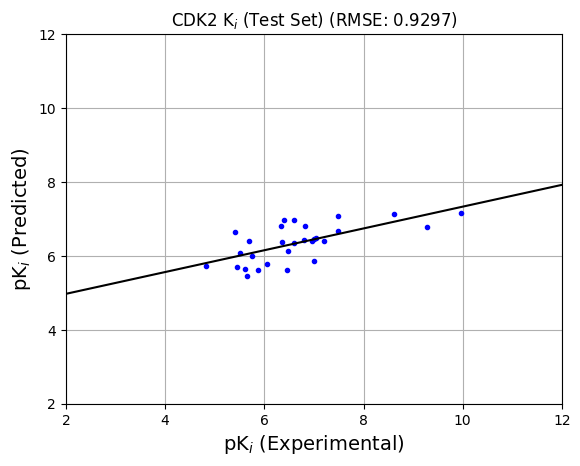

done!


In [7]:
#!/usr/bin/env python3
#
################################################################################
# Dr. Walter F. de Azevedo, Jr.                                                #
# [Scopus](https://www.scopus.com/authid/detail.uri?authorId=7006435557)       #
# [GitHub](https://github.com/azevedolab)                                      #
# July 20, 2024                                                                #
################################################################################
#
################################################################################
# Import section                                                               #
################################################################################
import sys
import pandas as pd
import math
import numpy as np
from itertools import combinations
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Ridge

################################################################################
# Define cross_validation() function                                           #
################################################################################
# Function to set up k-fold class. Kfold class to build a n fold
# cross-validation loop and test the generalization ability of regression. With
# cross-validation, we generally obtain a more conservative estimate(that is,
# the error is larger). The cross-validation estimate is a better estimate of
# how well we could generalize to predict on unseen data.
#
################################################################################
# Reference                                                                    #
################################################################################
# Coelho LP, Richert W. (2015) Building Machine Learning Systems with
# Python. 2nd ed. Packt Publishing Ltd. Birmingham UK. 301 pp. See page 162
# (Cross-validation for regression)
def cross_validation(model,X,y,n_splits,random_state,verbose):

    # Import section
    from sklearn.model_selection import KFold, cross_val_score
    from warnings import simplefilter
    import numpy as np

    # Set up k-fold class
    kf = KFold(n_splits=n_splits,shuffle=True, random_state=random_state)

    # Ignore all future warnings
    simplefilter(action='ignore', category=DeprecationWarning)

    # Looping through kf.split()
    for train,test in kf.split(X):

        # Generate regression model
        model.fit(X[train],y[train])

    # Show Walsh metrics if requestes
    if verbose:
        # Show average coefficient of determination using n-fold crossvalidation
        scores = cross_val_score(model,X,y,cv=kf)
        msg_out = "Average coefficient of determination using n-fold "
        msg_out += "cross-validation"
        print("\n"+msg_out+":",np.mean(scores))

    # Return model
    return model

################################################################################
# Define Walsh_and_de_Azevedo_regression_metrics() function                    #
################################################################################
def Walsh_and_de_Azevedo_regression_metrics(y,y_pred):
    """Function to calculate regression metrics as recommended by
    [Walsh et 2021](https://pubmed.ncbi.nlm.nih.gov/34316068/)
    and
    [de Azevedo Jr et al., 2024](https://pubmed.ncbi.nlm.nih.gov/38900052/))

    Parameters:
    y: array with experimental data (dimensions: (n,) )
    y_pred: array with predicted values (dimensions: (n,) )

    where n is the number of instances
    """

    # Import section for this function
    from sklearn.metrics import median_absolute_error
    from scipy import stats
    import numpy as np

    # Determine metrics
    n = len(y)
    y_bar = y.mean()
    rss = np.sum( np.square(y_pred - y) )
    rmse =  np.sqrt( (np.sum( (y - y_pred)**2 ))/n )
    ss_res = np.sum( (y - y_pred)**2 )
    ss_tot = np.sum( (y - y_bar)**2 )
    R2 = 1 - ss_res/ss_tot
    mae = median_absolute_error(y,y_pred)
    r_pearson,p_pearson = stats.pearsonr(y,y_pred)
    rho,p_spearman = stats.spearmanr(y,y_pred)
    core_dome = rmse**2 + mae**2 + (R2 -1)**2
    dome =    np.sqrt( core_dome )
    edomer2 = np.sqrt( core_dome + (r_pearson**2 - 1)**2 )
    edomerho =np.sqrt( core_dome + (rho**2 - 1)**2 )
    edome =   np.sqrt( core_dome + (r_pearson**2 - 1)**2 + (rho**2 - 1)**2 )

    # Return metrics
    return r_pearson,p_pearson,rho,p_spearman,rss,rmse,mae,R2,dome,edomer2,\
    edomerho,edome

################################################################################
# Define scatter_plot() function                                               #
################################################################################
def scatter_plot(y,y_pred,data_in,color_in,color_reg,plt_out,x_l,y_l,title,
                 xlim,ylim,dpi):
    """Function to generate a basic scatter plot"""

    # Import section
    import numpy as np
    import matplotlib.pyplot as plt

    # Create basic scatterplot
    plt.plot(y, y_pred,data_in,color=color_in)

    # Obtain m (slope) and b(intercept) of Ridge regression line
    m, b = np.polyfit(y,y_pred, 1)

    y_in = np.linspace(xlim[0], xlim[1], 100)

    # Use color_reg as color for regression line
    plt.plot(y_in, m*y_in+b, color=color_reg)
    plt.xlabel(x_l,fontsize = 14)
    plt.ylabel(y_l,fontsize = 14)
    plt.title(title,fontsize = 12)
    plt.xlim( xlim )
    plt.ylim( ylim )
    plt.grid()
    plt.savefig(plt_out,dpi=dpi)
    plt.show()

# Define main() function
def main():

    ############################################################################
    # Training set
    ############################################################################
    training_set_file_in = \
    "/content/cdk2_Ki_mvd_binding_training_set.csv"           # Update here for
                                                              # a new dataset
    # Try to open a CSV file
    try:
      training_set_data = pd.read_csv(training_set_file_in,delimiter=",")
      print("\nReading and preprocessing file: "+training_set_file_in,end="...")
    except IOError:
      file_in_training = training_set_file_in.replace("/content/","")
      msg_out = "\n\nIOError! I can't open file "+file_in_training+"!\n"
      msg_out += "Please upload file "+file_in_training+" "
      msg_out += "to Colab session storage!\n\n"
      sys.exit(msg_out)

    y_train = training_set_data.iloc[:,8]                     # Update here for
                                                              # a new dataset
    print("done!")

    ############################################################################
    # Test set
    ############################################################################
    test_set_file_in = \
    "/content/cdk2_Ki_mvd_binding_test_set.csv"               # Update here for
                                                              # a new dataset
    # Try to open a CSV file
    try:
      test_set_data = pd.read_csv(test_set_file_in,delimiter=",")
      print("\nReading and preprocessing file: "+test_set_file_in,end="...")
    except IOError:
      file_in_test = test_set_file_in.replace("/content/","")
      msg_out = "\n\nIOError! I can't open file "+file_in_test+"!\n"
      msg_out += "Please upload file "+file_in_test+" "
      msg_out += "to Colab session storage!\n\n"
      sys.exit(msg_out)

    y_test = test_set_data.iloc[:,8]             # Update here for a new dataset
    print("done!")

    ############################################################################
    # Define additional inputs
    ############################################################################
    plt_scatter_X_label_str,plt_scatter_y_label_str = "pK$_i$ (Experimental)",\
                        "pK$_i$ (Predicted)"            # Define labels for axes
    plt_dpi = 1500                                      # Plot dpi

    ############################################################################
    # Build regression models with Ridge
    ############################################################################
    # Set up variables
    n_models = 0
    l = 6      # Cn,l combinations, where n is the number of features in list_in

    #lst_in = ["Average Q","C","S","Csp2","E-Inter (protein - ligand)",
    #"E-Intra (hbond)","E-Intra (sp2-sp2)","E-Intra (steric)",] # For 8 features

    lst_in = ["Q","Average Q","C","S","Csp2","DOF","E-Inter (protein - ligand)",
    "E-Intra (hbond)","E-Intra (sp2-sp2)","E-Intra (steric)","E-Intra (tors)",
    "E-Intra (vdw)","Electro","HBond","HeavyAtoms","LE3","MW","OS","Steric",
    "Torsions","VdW (LJ12-6)","halogen"] # For 22 features

    y_list = [y_train,y_test]
    data_list = ["Training Set","Test Set"]
    data_out="Features,Data,n,r,p-value(r),r2,rho,p-value(rho),RSS,RMSE,MAE,R2,"
    data_out += "DOME,EDOMEr2,EDOMErho,EDOME\n"
    data_features = []

    # Calculate the number of combinations (Cn,l)
    n = len(lst_in)
    C_n_l = int(math.factorial(n)/( math.factorial(l)*math.factorial(n - l) ))
    rmse_array = np.zeros(C_n_l)

    # Get all combinations of elements in lst_in and length l
    comb_lst_in = combinations(lst_in, l)

    # Show message
    msg_out = "\nGenerating "+str(C_n_l)+" regression models"
    print(msg_out,end="...")

    # Looping through comb_lst_in
    for feature_list in list(comb_lst_in):

        # Make it a list
        feature_list = list(feature_list)
        data_features.append(feature_list)

        try:
            # For training set
            X_train = training_set_data[feature_list]
            scaler_train = preprocessing.StandardScaler().fit(X_train)
            X_train = scaler_train.transform(X_train)

            # For test set
            X_test = test_set_data[feature_list]
            scaler_test = preprocessing.StandardScaler().fit(X_test)
            X_test = scaler_test.transform(X_test)
            n_models += 1

            # Instantiate an object of Ridge() class
            lin_reg = Ridge(alpha = 0.04, solver = "cholesky").fit(X_train,
                                                                        y_train)

            # Call cross_validation() function
            lin_reg = cross_validation(lin_reg,X_train,y_train,5,46,False)
            y_train_pred_reg = lin_reg.predict(X_train)
            y_test_pred_reg = lin_reg.predict(X_test)
            y_pred_list = [y_train_pred_reg,y_test_pred_reg]

            # Looping through data
            for count,y in enumerate(y_list):

                # Call Walsh_and_de_Azevedo_regression_metrics() function
                r_pearson,p_pearson,rho,p_spearman,rss,rmse,mae,R2,dome,\
                edomer2,edomerho,edome = \
                Walsh_and_de_Azevedo_regression_metrics(y_list[count],
                                                            y_pred_list[count])

                # Set up output line
                line_out = str(feature_list).replace("'","").replace("[","").\
                                                replace("]","").replace(","," ")
                line_out += ","+data_list[count]+","+str(len(y))+","
                line_out += "{:.4f}".format(r_pearson)+","
                line_out += "{:.4e}".format(p_pearson)+","
                line_out += "{:.4f}".format(r_pearson**2)+","
                line_out += "{:.4f}".format(rho)+","
                line_out += "{:.4e}".format(p_spearman)+","
                line_out += "{:.4e}".format(rss)+","
                line_out += "{:.4f}".format(rmse)+","+"{:.4f}".format(mae)+","
                line_out += "{:.4f}".format(R2)+","+"{:.4f}".format(dome)+","
                line_out += "{:.4f}".format(edomer2)+","
                line_out += "{:.4f}".format(edomerho)+","
                line_out += "{:.4f}".format(edome)

                # Get test set
                if count > 0:

                    # Add test set rmse to the array rmse_array
                    rmse_array[n_models-1] = rmse

            # Update data_out
            data_out += line_out+"\n"

        except:
            print("\nError I didn't generate a regression model for ",
                                                                feature_list)

    print("done!")

    # Open a new file and write data_out and close it
    fo_out = open("regression_metrics.csv","w")
    fo_out.write(data_out)
    fo_out.close()
    print("\nNumber of generated regression models: ",n_models)
    print("\nMetrics saved to file: regression_metrics.csv")

    # Find minimum rmse
    min_i = np.argmin(rmse_array)
    best_features = data_features[min_i]
    best_rmse = rmse_array[min_i]
    msg_out = "\nMinimum RMSE: {:.4f}".format(best_rmse)
    msg_out += " for features: "+str(best_features)
    print(msg_out)

    # Regression model for the best set of features
    # For training set
    X_train = training_set_data[best_features]
    scaler_train = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler_train.transform(X_train)

    # For test set
    X_test = test_set_data[best_features]
    scaler_test = preprocessing.StandardScaler().fit(X_test)
    X_test = scaler_test.transform(X_test)

    # Instantiate an object of Ridge() class
    lin_reg = Ridge(alpha = 0.04, solver = "cholesky").fit(X_train,y_train)

    # Call cross_validation() function
    lin_reg = cross_validation(lin_reg,X_train,y_train,5,46,False)
    y_train_pred_reg = lin_reg.predict(X_train)
    y_test_pred_reg = lin_reg.predict(X_test)

    # Call scatter_plot() function for the best regression model
    print("\nSaving scatter plot to file: test_set_scatter_plot.pdf",end="...")
    plt_scatter_title_str = "CDK2 K$_i$ (Test Set)"
                                                 # Update here for a new dataset
    plt_scatter_title_str += " (RMSE: {:.4f}".format(best_rmse)+")"
    plot_out = "test_set_scatter_plot.pdf"
    xlim = (2.0, 12.0)                           # Update here for a new dataset
    ylim = (2.0, 12.0)                           # Update here for a new dataset
    scatter_plot(y_test,y_test_pred_reg,".","blue","black",plot_out,
    plt_scatter_X_label_str,plt_scatter_y_label_str,plt_scatter_title_str,xlim,
             ylim,plt_dpi)
    print("done!")

# Call main() function
main()